<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#charger les packages
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
#lire le fichier
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [ ]:
# afficher les 5 lignes du dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analyse exploratoire de données

In [ ]:
df.describe()#résumé statistique

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()#information dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Les variables explicatives ou les features de chaque individu sont représentés par les huit premiers attributs
#du data set, et la variable à prédire est Outcome.

#creer une variable data qui ne contient que les features
data = df.loc[:, df.columns != 'Outcome']

#stocker les données cibles dans la variable target

target = df['Outcome']


In [ ]:
# division des données
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.3,random_state = 0)

## Decision tree classifier (arbre de décision)

L'arbre de décision est l'un des premiers algorithmes de Machine Learning que les Data Scientists apprennent au cours de leur formation. Il est utilisé pour représenter visuellement et explicitement les décisions et la prise de décision pour des problèmes de classification ainsi que pour des problèmes de régression. Il représente aussi l'élément de base de plusieurs modèles comme le Random Forest ou XGBoost.

Tout d'abord, qu'est-ce qu'un arbre de décision ? Visuellement, cela ressemble à une structure descendante composée de noeuds : chaque noeud possède une condition qui amène à plusieurs réponses, ce qui dirige à un prochain noeud.

Lorsqu'un nœud donne la réponse, on dit que le nœud est terminal. Prenons l'arbre de décision suivant qui indique si l'on doit prendre un parapluie avec nous en fonction du temps.

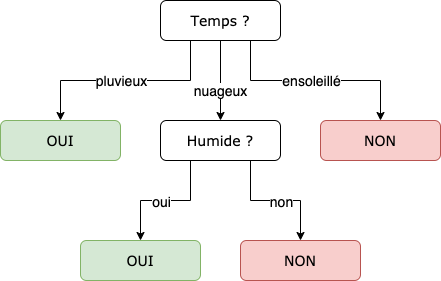

Dans cet exemple, un jour ensoleillé donnera directement la réponse NON, alors qu'un jour nuageux donnera la réponse OUI ou NON en fonction de l'humidité.

Sur ce graphique, chaque nœud peut avoir aucune ou plusieurs possibilités: cela va dépendre de s'il est terminal ou non.

Un arbre de décision binaire est un arbre où chaque nœud non terminal possède exactement deux possibilités (gauche et droite). Prenons l'arbre suivant qui indique la mention obtenue à un examen pour un étudiant, et s'il a le droit à des rattrapages en cas de note inférieure à 10.

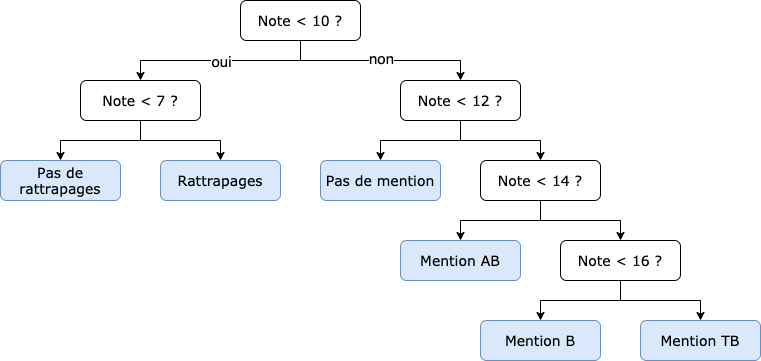

Plusieurs points sont à noter :

* Le premier noeud est appelé noeud racine et possède toujours exactement deux noeuds enfants.
* Chaque noeud non terminal possède toujours deux noeuds enfants.
* Les conditions de noeuds ne peuvent avoir que deux états : Vrai ou Faux.
* Le noeud enfant de gauche correspond toujours (dans cet arbre) à la situation où la condition est vérifiée (Vrai), et inversement le noeud enfant de droite correspond toujours à la situation où la condition n'est pas vérifiée (Faux).

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#creer tree avec une instance de la classe Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth = 5)
#entrainer l'algorithm (utiliser fit)
tree.fit (X_train, y_train)
#calculer le f-score
y_pred = tree.predict(X_test)
f1_score(y_test, y_pred)

0.5957446808510638

## KNN

En apprentissage supervisé, un algorithme reçoit un ensemble de données qui est étiqueté avec des valeurs de sorties correspondantes sur lequel il va pouvoir s’entraîner et définir un modèle de prédiction. Cet algorithme pourra par la suite être utilisé sur de nouvelles données afin de prédire leurs valeurs de sorties correspondantes.

Voici une illustration simplifiée :

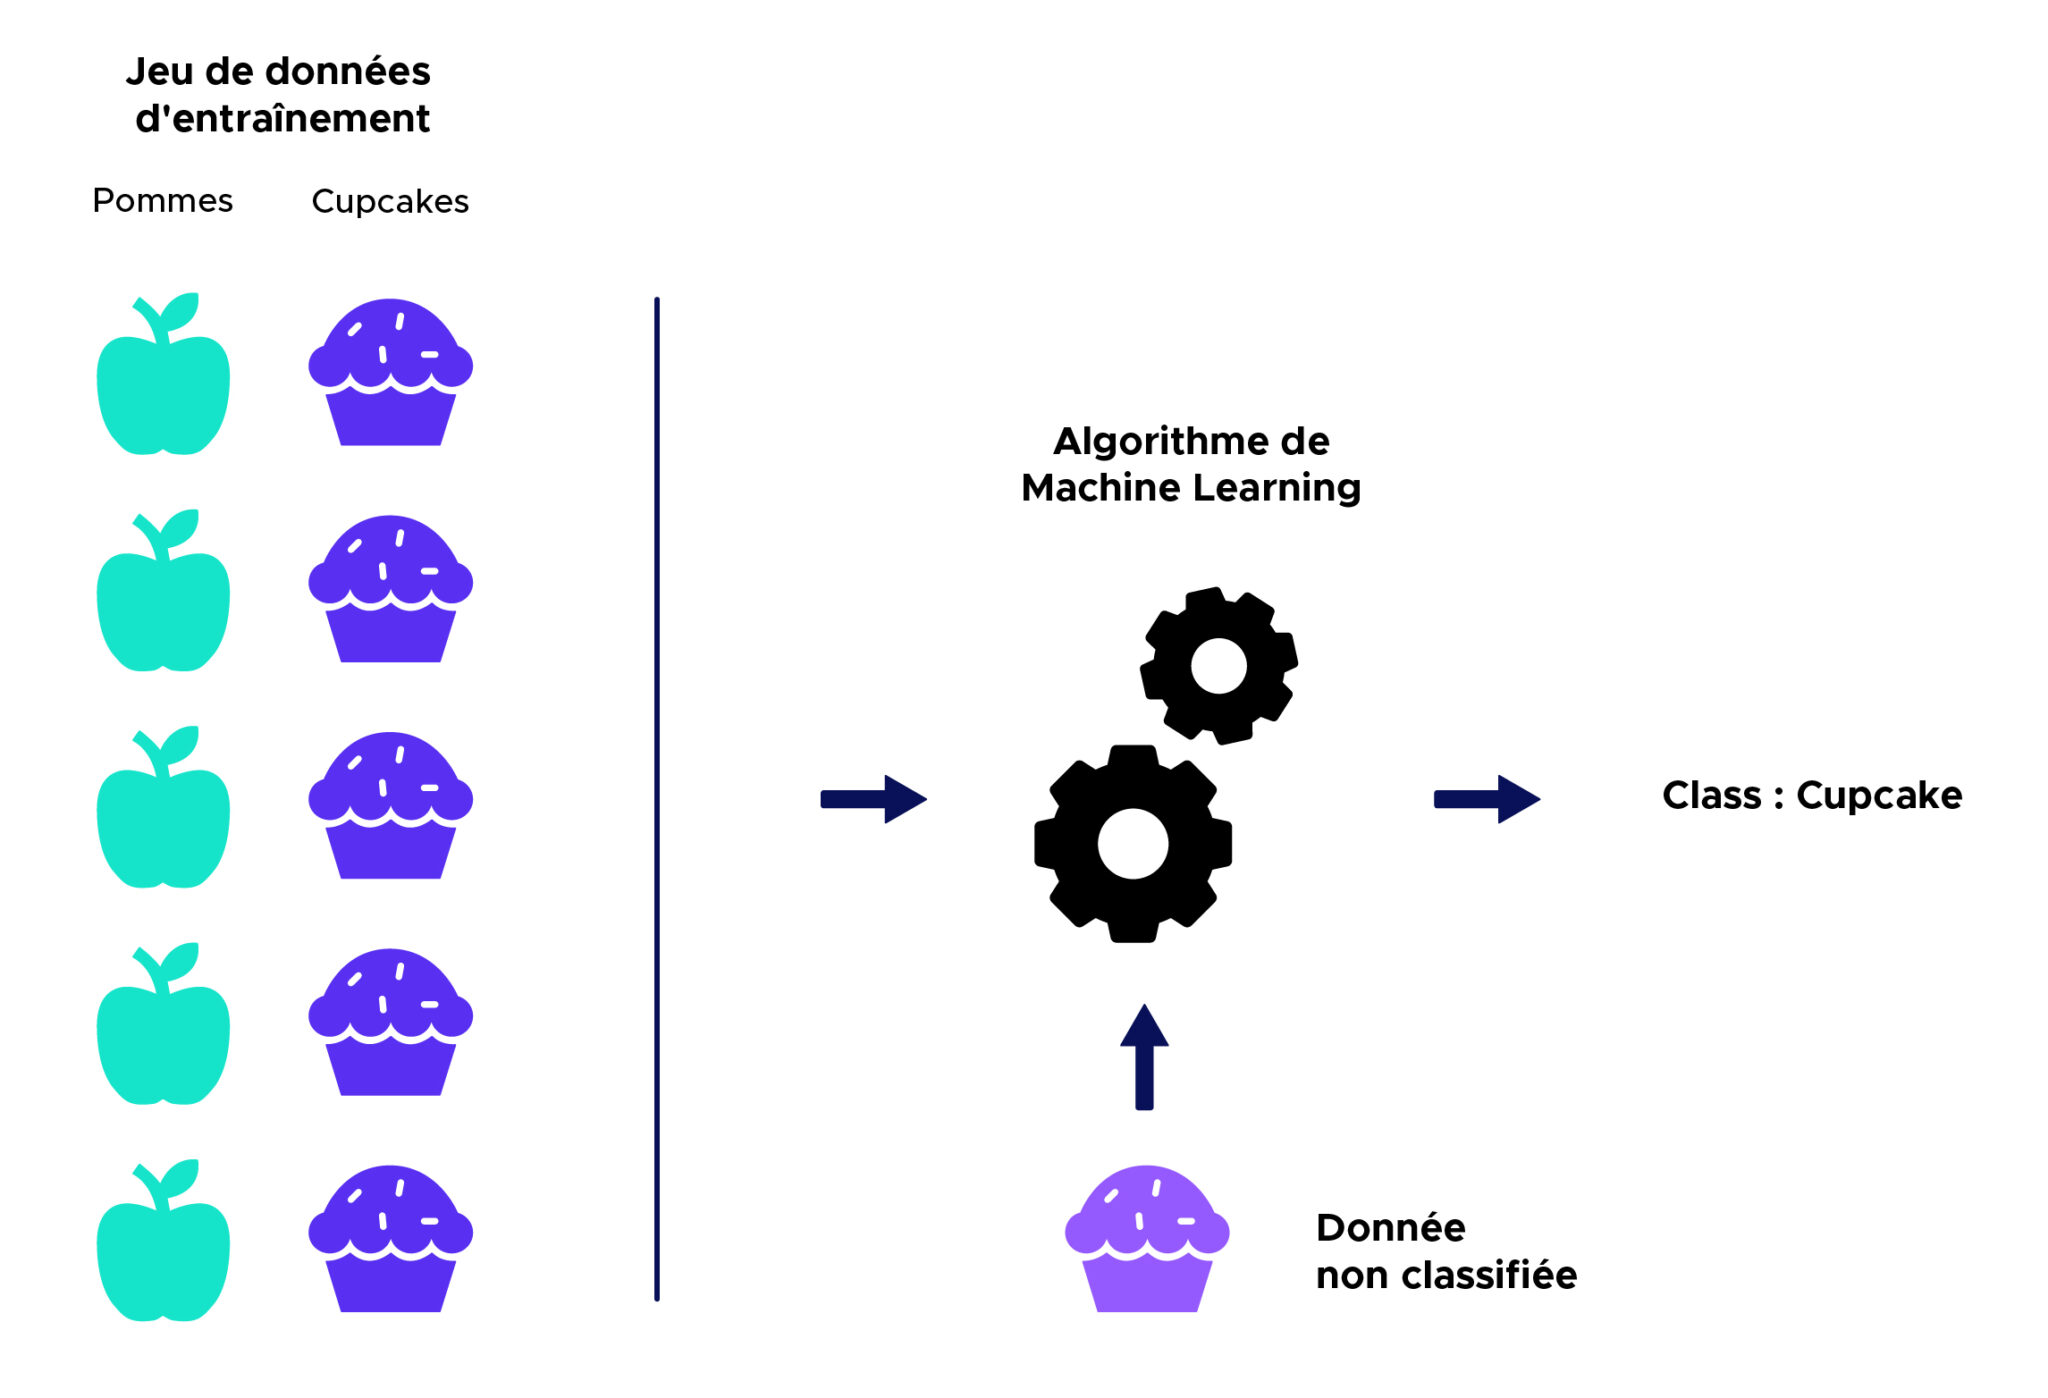

L’intuition derrière l’algorithme des K plus proches voisins est l’une des plus simples de tous les algorithmes de Machine Learning supervisé :

- Étape 1 :  Sélectionnez le nombre K de voisins
- Étape 2 :  Calculez la distance

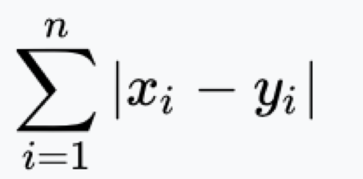

distance Manhattan

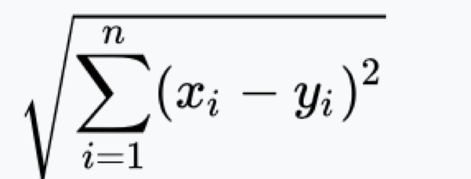

distance euclidienne

article types de distance : https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4#:~:text=KNN%20is%20a%20distance%2Dbased,the%20more%20similar%20they%20are.

Du point non classifié aux autres points.

- Étape 3 :  Prenez les K voisins les plus proches selon la distance calculée.
- Étape 4 :  Parmi ces K voisins, comptez le nombre de points  appartenant à chaque catégorie.
- Étape 5 : Attribuez le nouveau point à la catégorie la plus présente parmis ces K voisins.
- Étape 6 : Notre modèle est prêt :

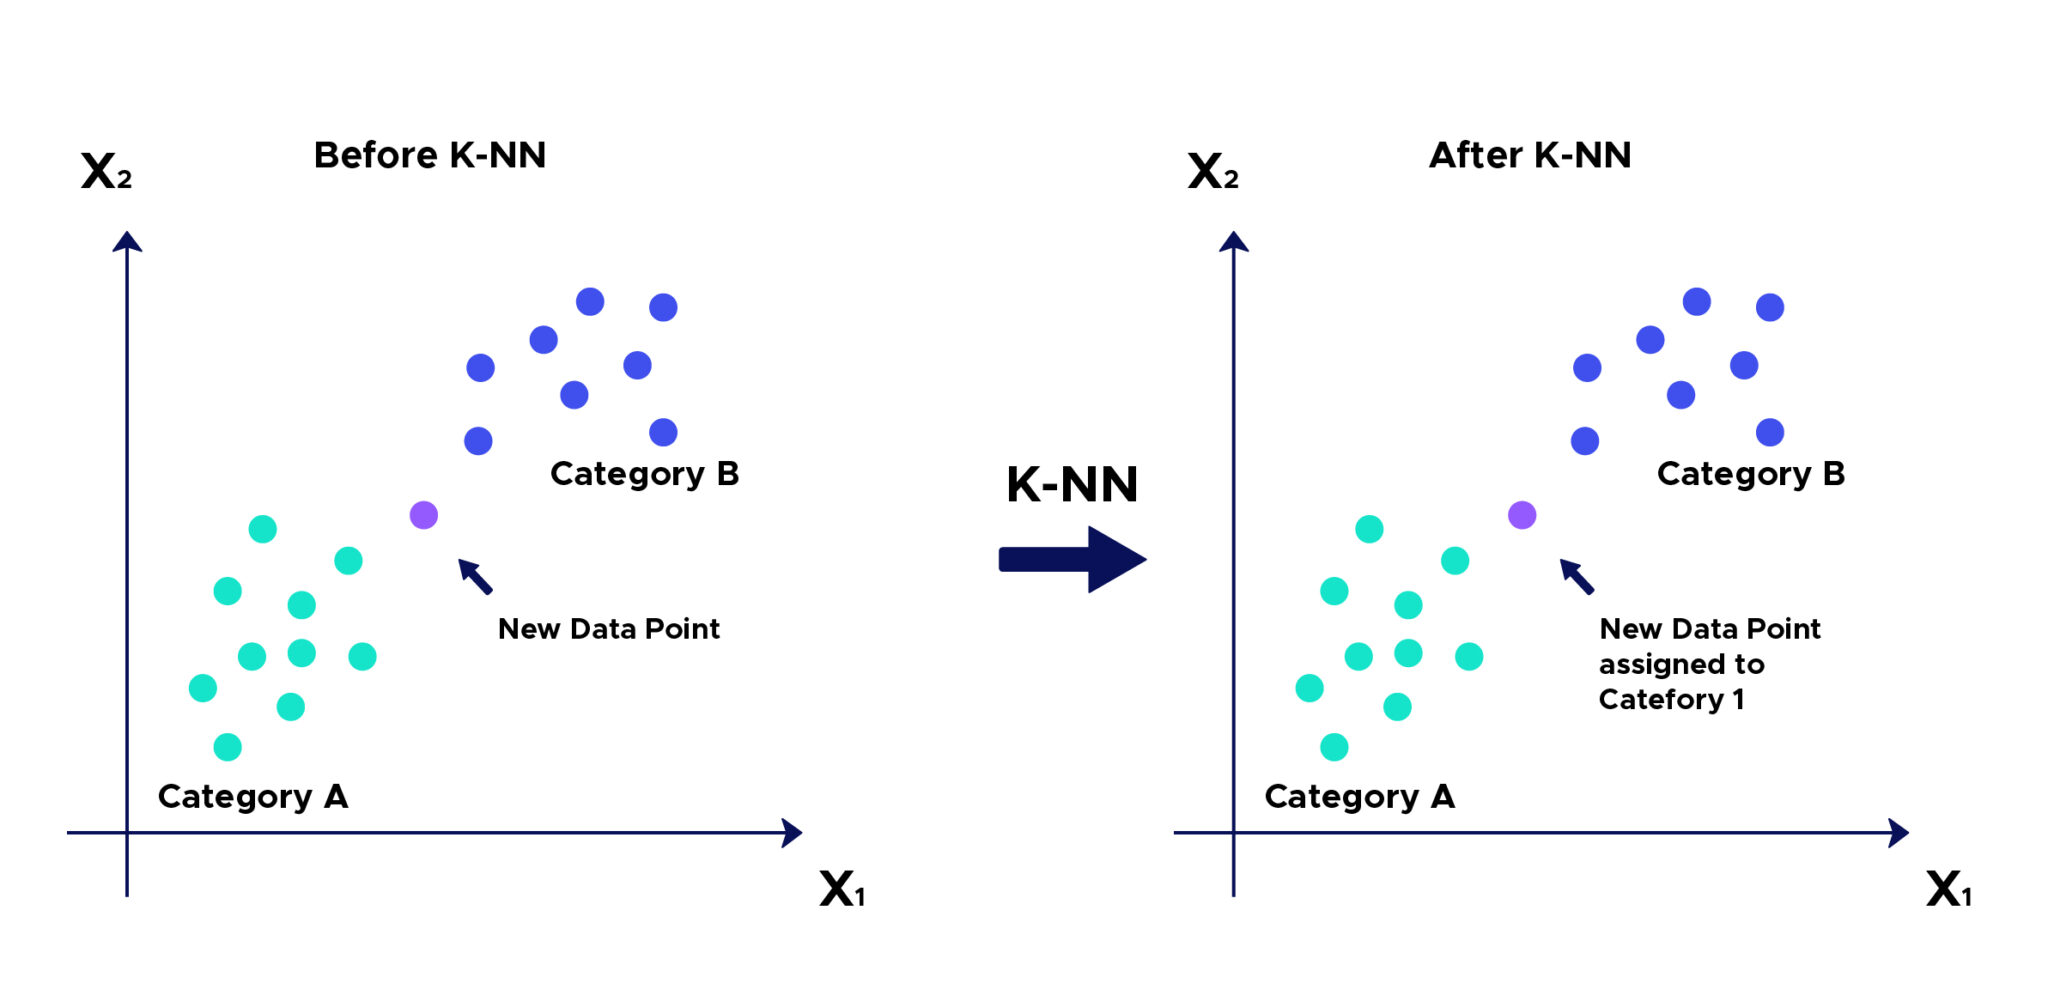


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
#Creer KNN avec une instance de la classe KNeighborsClassifier
knn =   KNeighborsClassifier(metric='manhattan', n_neighbors = 7)
#entrainer l'algorithm (usar fit)
knn.fit (X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [ ]:
#calculer le f-score
y_pred = knn.predict(X_test)
f1_score(y_test, y_pred)

0.5547445255474451

## GaussianNB ( Naive Bayes)

In [ ]:
# Créer nb, une instance de la classe avec les paramètres par défaut                                                                                                                                                                                    GaussianNB
nb = GaussianNB()
#entrainer l'algorithm (usar fit)
nb.fit (X_train, y_train)

GaussianNB()

In [ ]:
#calculer le f-score
y_pred = nb.predict(X_test)
f1_score(y_test, y_pred)

0.5801526717557252

In [ ]:
#Calcul de la f-mesure (f1-score)
vc = VotingClassifier(estimators=[('tree', tree), ('knn', knn),('nb', nb)], voting='hard')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(max_depth=5)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7)),
                             ('nb', GaussianNB())])

In [ ]:
# Evaluation du modèle
y_pred = vc.predict(X_test)
f1_score(y_test, y_pred)

0.5909090909090909

La proportion de solutions trouvées qui sont pertinentes est aux environs de 70%. Le F-mesure du *Voting classifier* est supérieure à celle des trois classificateurs . Ainsi, le modèle *Voting Classifier* utilise une une combinaison parallèle de méta-classificateurs. La prédiction de la classe finale est le résultat d'un vote des étiquettes des méta classificateurs